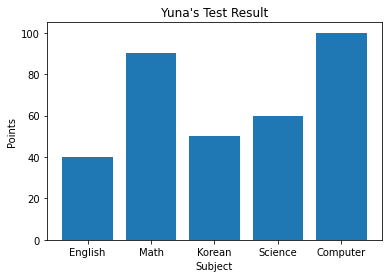

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

# 그래프 데이터 
subject = ['English', 'Math', 'Korean', 'Science', 'Computer']
points = [40, 90, 50, 60, 100]

# 축 그리기
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

# 그래프 그리기
ax1.bar(subject, points)

# 라벨, 타이틀 달기
plt.xlabel('Subject')
plt.ylabel('Points')
plt.title("Yuna's Test Result")

# 보여주기
plt.savefig('./barplot.png')  # 그래프를 이미지로 출력
plt.show()                    # 그래프를 화면으로 출력

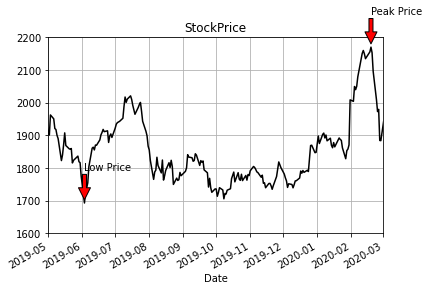

In [3]:
from datetime import datetime
import pandas as pd
import os

# 그래프 데이터 
#csv_path = os.getenv("HOME") + "/aiffel/data_visualization/data/AMZN.csv"
data = pd.read_csv('~/data/AMZN.csv', index_col=0, parse_dates=True)
price = data['Close']

# 축 그리기 및 좌표축 설정
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
price.plot(ax=ax, style='black')
plt.ylim([1600, 2200])
plt.xlim(['2019-05-01', '2020-03-01'])

# 주석달기
important_data = [(datetime(2019, 6, 3), "Low Price"), (datetime(2020, 2, 19), "Peak Price")]
for d, label in important_data:
    ax.annotate(label, xy=(d, price.asof(d)+10), # 주석을 달 좌표(x,y)
                xytext=(d, price.asof(d)+100), # 주석 텍스트가 위치할 좌표(x,y)
                arrowprops=dict(facecolor='red')) # 화살표 추가 및 색 설정

# 그리드, 타이틀 달기
plt.grid()
ax.set_title('StockPrice')

# 보여주기
plt.show()

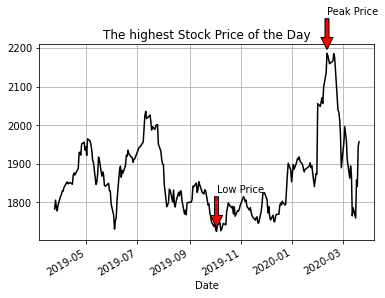

In [4]:
# Q. 날짜별 종가(Close)가 아닌 최고가(High) 데이터를 이용해서 위와 같은 그래프를 그려보세요!
# 그래프 데이터 
#csv_path = os.getenv("HOME") + "/aiffel/data_visualization/data/AMZN.csv"
#data = pd.read_csv(csv_path, index_col=0, parse_dates=True)
price = data['High']

# 축 그리기 및 좌표축 설정
# [[YOUR CODE]]
fig2 = plt.figure()
ax2 = fig2.add_subplot(1,1,1)
price.plot(ax=ax2, style='black')

# 날짜 정보를 python datetime 자료형으로 변환
min_date = price.idxmin().to_pydatetime()
max_date = price.idxmax().to_pydatetime()

# 주석달기
important_data = [(min_date, "Low Price"), (max_date, "Peak Price")]
# [[YOUR CODE]]
for d, label in important_data:
    ax2.annotate(label, xy=(d, price.asof(d)+10), # 주석을 달 좌표(x,y)
                xytext=(d, price.asof(d)+100),    # 주석 텍스트가 위치할 좌표(x,y)
                arrowprops=dict(facecolor='red')) # 화살표 추가 및 색 설정

# 그리드, 타이틀 달기
# [[YOUR CODE]]
plt.grid()
ax2.set_title('The highest Stock Price of the Day')
# 보여주기
# [[YOUR CODE]]
plt.show()

## 범주형 데이터

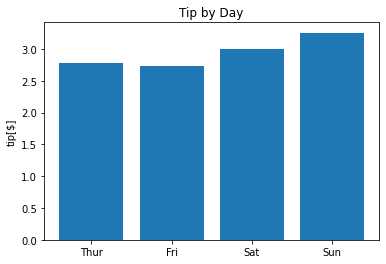

In [12]:
# Q. 요일(day)에 따른 평균 tip의 그래프를 그려보세요.

import seaborn as sns

df = sns.load_dataset('tips')

grouped = df['tip'].groupby(df['day'])
tips = dict(grouped.mean())

x = list(tips.keys())
y = list(tips.values())

plt.bar(x, y)
plt.ylabel('tip[$]')
plt.title('Tip by Day')
plt.show()

<AxesSubplot:xlabel='day', ylabel='tip'>

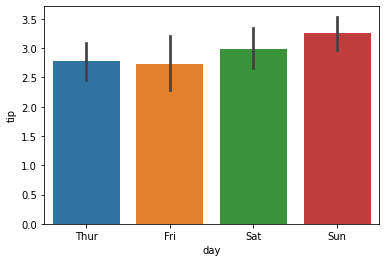

In [13]:
sns.barplot(data=df, x='day', y='tip')

Text(0.5, 1.0, 'Tip by day')

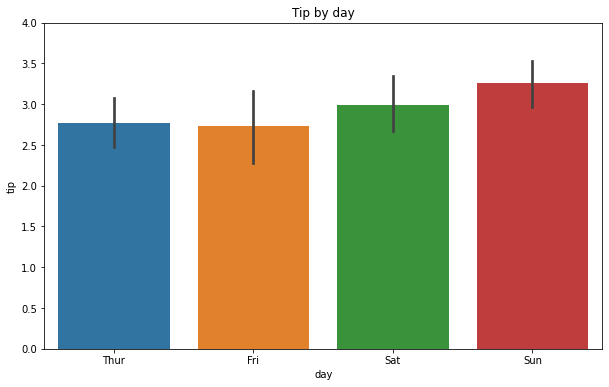

In [14]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='day', y='tip')
plt.ylim(0, 4)
plt.title('Tip by day')

<AxesSubplot:xlabel='day', ylabel='tip'>

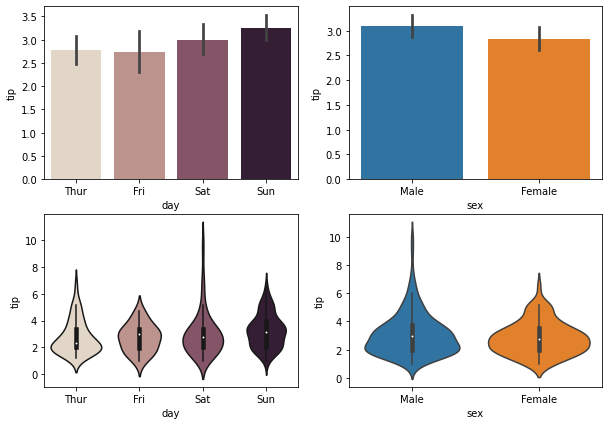

In [15]:
fig = plt.figure(figsize=(10,7))

ax1 = fig.add_subplot(2,2,1)
sns.barplot(data=df, x='day', y='tip', palette="ch:.25")

ax2 = fig.add_subplot(2,2,2)
sns.barplot(data=df, x='sex', y='tip')

ax3 = fig.add_subplot(2,2,4)
sns.violinplot(data=df, x='sex', y='tip')

ax4 = fig.add_subplot(2,2,3)
sns.violinplot(data=df, x='day', y='tip', palette="ch:.25")

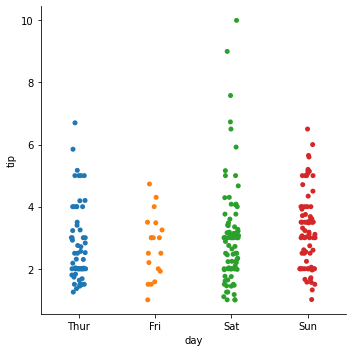

In [19]:
sns.catplot(x='day', y='tip', jitter=True, data=df)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

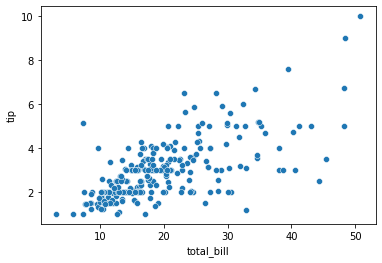

In [20]:
# tip과 total_bill의 관계 시각화
sns.scatterplot(data=df, x='total_bill', y='tip', palette="ch:r=-.2,d=.3_r")

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

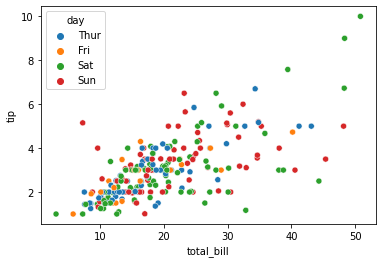

In [21]:
# day에 따른 tip과 total_bill의 관계 시각화
sns.scatterplot(data=df, x='total_bill', y='tip', hue='day')

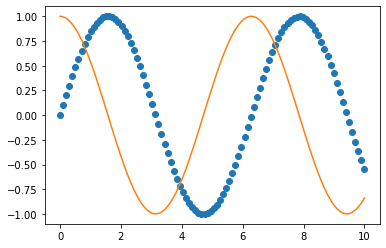

In [23]:
import numpy as np

x = np.linspace(0, 10, 100) 
plt.plot(x, np.sin(x), 'o')
plt.plot(x, np.cos(x)) 
plt.show()

<AxesSubplot:>

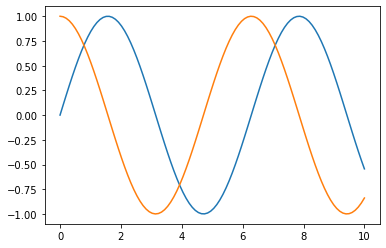

In [24]:
sns.lineplot(x=x, y=np.sin(x))
sns.lineplot(x=x, y=np.cos(x))

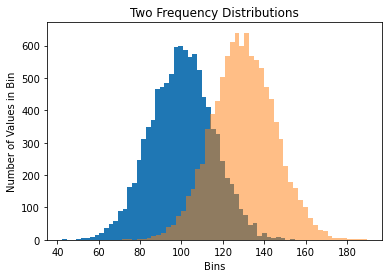

In [25]:
#그래프 데이터
mu1, mu2, sigma = 100, 130, 15
x1 = mu1 + sigma*np.random.randn(10000)
x2 = mu2 + sigma*np.random.randn(10000)

# 축 그리기
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

# 그래프 그리기
patches = ax1.hist(x1, bins=50, density=False)  # bins는 x값을 총 50개 구간으로 나눈다는 뜻입니다.
patches = ax1.hist(x2, bins=50, density=False, alpha=0.5)
ax1.xaxis.set_ticks_position('bottom')  # x축의 눈금을 아래 표시 
ax1.yaxis.set_ticks_position('left')  # y축의 눈금을 왼쪽에 표시

# 라벨, 타이틀 달기
plt.xlabel('Bins')
plt.ylabel('Number of Values in Bin')
ax1.set_title('Two Frequency Distributions')

# 보여주기
plt.show()

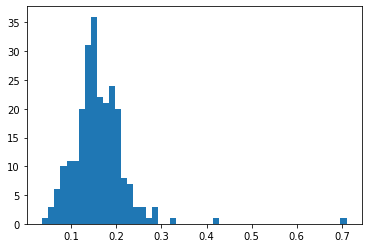

In [26]:
# Q. pyplot을 이용해서 그려봅시다.
# bin의 개수는 50개로 지정해주세요.
df['tip_pct'] = df['tip']/df['total_bill']
# [[YOUR CODE]]
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
patches = ax.hist(df['tip_pct'], bins=50, density=False)

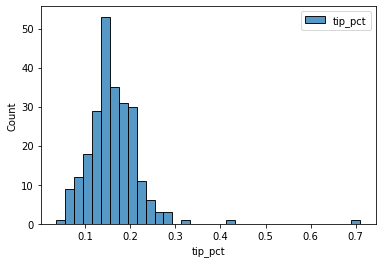

In [27]:
# Q. 이번에는 seaborn을 이용해서 그려봅시다.
# [[YOUR CODE]]
sns.histplot(df['tip_pct'], label="tip_pct").legend()

<AxesSubplot:ylabel='Density'>

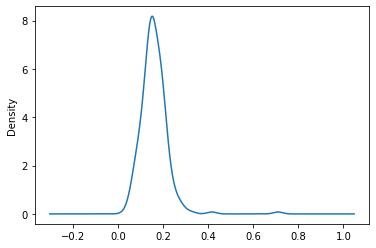

In [28]:
df['tip_pct'].plot(kind='kde')

## 시계열 데이터 시각화하기

In [30]:
flights = sns.load_dataset('flights')
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


<AxesSubplot:xlabel='year', ylabel='passengers'>

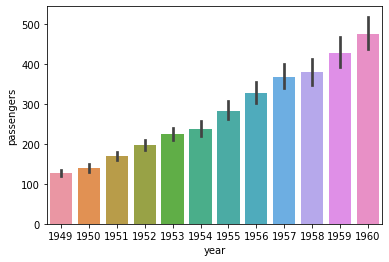

In [31]:
sns.barplot(data=flights, x='year', y='passengers')

<AxesSubplot:xlabel='year', ylabel='passengers'>

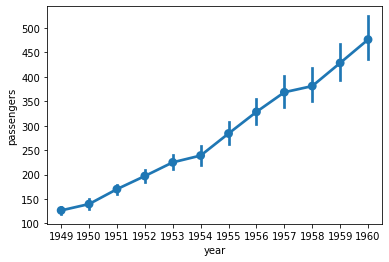

In [32]:
# Q. seaborn pointplot을 그려봅시다.
# [[YOUR CODE]]
sns.pointplot(data=flights, x='year', y='passengers')

<AxesSubplot:xlabel='year', ylabel='passengers'>

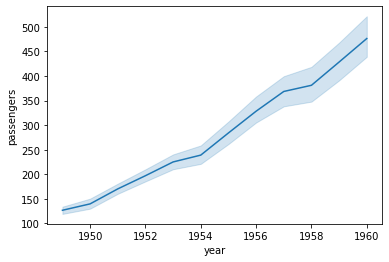

In [33]:
# Q. seaborn lineplot을 그려봅시다.
# [[YOUR CODE]]
sns.lineplot(data=flights, x='year', y='passengers')

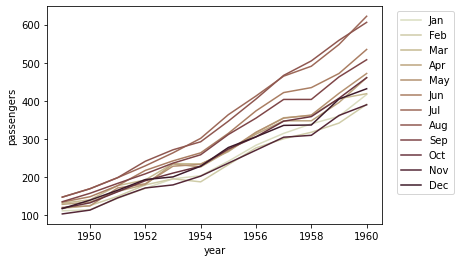

In [34]:
sns.lineplot(data=flights, x='year', y='passengers', hue='month', palette='ch:.50')
plt.legend(bbox_to_anchor=(1.03, 1), loc=2) #legend 그래프 밖에 추가하기

<AxesSubplot:xlabel='passengers', ylabel='Count'>

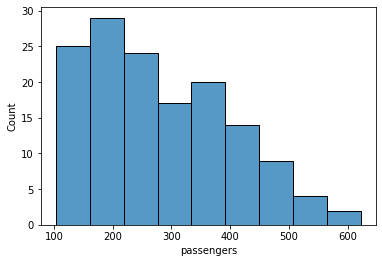

In [35]:
sns.histplot(flights['passengers'])

## Heatmap

In [36]:
pivot = flights.pivot(index='year', columns='month', values='passengers')
pivot

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


<AxesSubplot:xlabel='month', ylabel='year'>

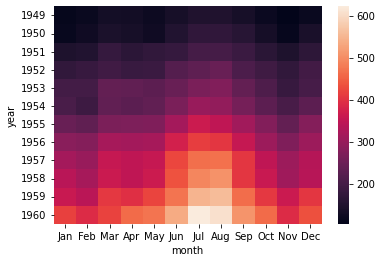

In [37]:
sns.heatmap(pivot)

<AxesSubplot:xlabel='month', ylabel='year'>

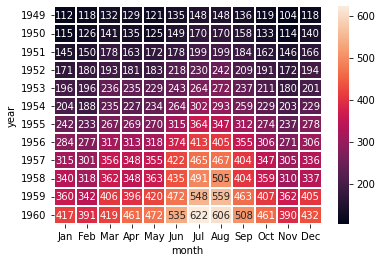

In [38]:
sns.heatmap(pivot, linewidths=.2, annot=True, fmt="d")

<AxesSubplot:xlabel='month', ylabel='year'>

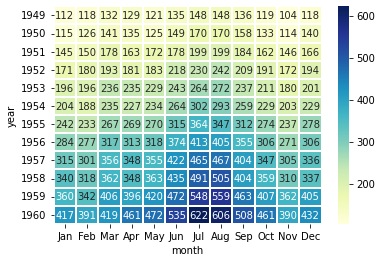

In [39]:
sns.heatmap(pivot, linewidths=.1, annot=True, fmt="d", cmap="YlGnBu")

## 종합퀴즈

<AxesSubplot:xlabel='tip', ylabel='total_bill'>

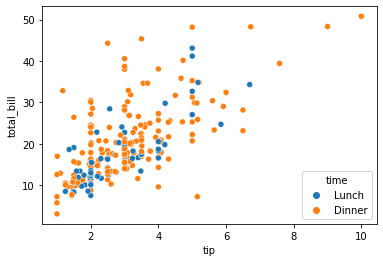

In [41]:
# Q. 시간대(time)에 따른 tip과 total_bill의 관계를 scatter plot으로 시각화해봅시다.
# [[YOUR CODE]]

tips = sns.load_dataset('tips')
sns.scatterplot(data=tips, x='tip', y='total_bill', hue='time')

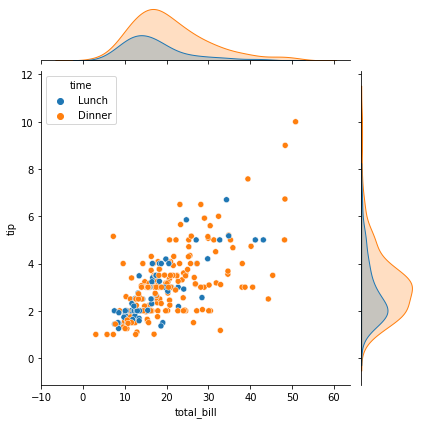

In [42]:
# Q. seaborn jointplot의 문서를 참고하여 아래와 같은 그래프를 그려보세요!
# [[YOUR CODE]]
sns.jointplot(data=tips, x='total_bill', y='tip', hue='time')